<a href="https://colab.research.google.com/github/ViditPy/-MATPLOTLIB-LINE-GRAPH-HISTOGRAM-PIE-CHART-BOX-ANDWHISKERS-GRAPH-PROJECT-KAGGLE--FIFA-GAS-DATASET/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Credit Card Fraud Detection"
Anonymized credit card transactions labeled as fraudulent or genuine

This Dataset has been downloaded from (https://www.kaggle.com/mlg-ulb/creditcardfraud)


![alt text](https://drive.google.com/uc?id=1ZfTcc7JdVfztZsAwqAc1IhVKj2EZ1SMX)


Credit Card Fraud Detection Predictive Models:

Content
Introduction
Load packages
Read the data
Check the data
Glimpse the data
Check missing data
Check data unbalance
Data exploration
Predictive models
RandomForrestClassifier
AdaBoostClassifier
CatBoostClassifier
XGBoost
LightGBM
Conclusions
References

                 "INTRODUCTION"
                

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [0]:
## LOADING PACKAGES


In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
pd.set_option('display.max_columns', 100)


READ THE DATA


In [0]:
df = pd.read_csv('creditcard.csv')

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [32]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162552,115210.0,2.114128,-1.104488,0.415559,-0.749874,-1.717262,-0.387432,-1.560780,-0.004930,0.436754,0.645260,-0.635782,0.264381,1.738666,-1.146472,0.475146,1.590927,-0.173932,-0.850725,0.167184,0.070612,0.441625,1.448872,0.180504,0.118535,-0.375367,-0.098409,0.065220,-0.028177,9.99,0.0
162553,115211.0,1.972488,0.052897,-1.960439,1.080410,0.922172,-0.136797,0.498360,-0.142762,-0.011417,0.412747,0.264839,0.711723,-0.447591,0.735657,-1.115100,-0.368542,-0.555395,0.051463,0.242403,-0.199770,0.080830,0.313451,-0.057854,0.220695,0.490273,-0.515163,-0.030846,-0.065219,37.40,0.0
162554,115211.0,1.957099,-0.564585,-0.336281,0.229964,-0.691445,-0.115662,-0.769791,0.098782,1.052559,0.163237,0.427894,0.927132,0.119871,-0.096096,-0.320551,0.601581,-0.833908,0.624392,0.146190,-0.148638,0.247960,0.897746,0.074085,-0.261071,-0.246790,0.741045,-0.033620,-0.061522,17.90,0.0
162555,115211.0,1.850556,-0.850150,-1.826873,-0.526510,1.710747,3.824289,-1.112847,0.998865,0.863568,0.083832,-0.056634,0.281774,0.059193,0.143507,1.274465,0.448966,-0.763780,0.014344,-0.618841,0.022673,0.229472,0.534459,0.156911,0.742622,-0.274273,0.369661,-0.006685,-0.038230,76.50,0.0
162556,115211.0,-0.694980,0.247120,2.074755,-0.017298,-0.215007,-0.235263,-0.037201,0.164253,0.247815,-0.632305,-1.381501,-0.932513,-1.180512,-0.040421,0.913613,-0.068070,-0.020050,0.540717,0.947337,0.114871,0.220919,0.645922,-0.408868,-0.055975,0.384300,1.057126,0.000000,NaN,NaN,NaN


In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162557.000000,162556.000000,162556.000000,162556.000000
mean,58171.885363,-0.198303,0.051721,0.550907,0.134962,-0.200534,0.064280,-0.091888,0.040514,0.021173,-0.038126,0.214700,-0.106567,0.074095,0.097029,0.150706,-0.011574,0.048372,-0.053401,-0.022933,0.033590,-0.034248,-0.095982,-0.025385,0.010325,0.103639,0.014138,0.002265,0.002533,86.984757,0.002190
std,25278.368459,1.844868,1.612322,1.361511,1.363530,1.334221,1.291914,1.207970,1.234985,1.158806,1.096555,1.049017,1.160813,1.056532,0.980483,0.954048,0.882360,0.920818,0.834377,0.811553,0.722585,0.744550,0.658072,0.584067,0.597236,0.457095,0.492238,0.392052,0.309178,244.368678,0.046746
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.049895,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40328.000000,-1.001231,-0.527555,0.018160,-0.721627,-0.846009,-0.683013,-0.590102,-0.154922,-0.661376,-0.520902,-0.542751,-0.521936,-0.624341,-0.324209,-0.429717,-0.472088,-0.409240,-0.523228,-0.502520,-0.181054,-0.231574,-0.549142,-0.170926,-0.329331,-0.177899,-0.330780,-0.064320,-0.018924,5.370000,0.000000
50%,58863.000000,-0.221015,0.118986,0.665016,0.142555,-0.246039,-0.195770,-0.039476,0.062614,-0.081610,-0.115318,0.135752,0.110874,0.038786,0.100953,0.266868,0.061548,-0.012179,-0.053661,-0.027056,-0.034456,-0.058051,-0.076351,-0.038982,0.061618,0.146610,-0.060070,0.009644,0.021914,21.300000,0.000000
75%,76367.000000,1.175741,0.811027,1.320090,0.957397,0.340677,0.452854,0.449267,0.357911,0.649631,0.396295,1.025638,0.621213,0.757507,0.536064,0.847539,0.525511,0.440563,0.426707,0.466148,0.157193,0.120266,0.344013,0.093512,0.413860,0.405170,0.277149,0.089625,0.078156,76.130000,0.000000
max,115211.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [0]:
## CHECK MISSING DATA

In [13]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,Class,V17,V6,V7,V8,V9,V10,V11,V12,V13,V14,Amount,V16,V15,V18,V24,V28,V27,V19,V25,V26,V23,V22,V21,V20,V5,V4,V3,V2,V1,Time
Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.0,0.0,0.0,0.0,0.0,0.0


"DATA UNBALANCE"


In [35]:
temp = df["Class"].value_counts()
df1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df1['Class'],y = df1['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df1['values'])
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600)
         
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')


In [36]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
#plt.figure(figsize = (14,4))
#plt.title('Credit Card Transactions Time Density Plot')
#sns.set_color_codes("pastel")
#sns.distplot(class_0,kde=True,bins=480)
#sns.distplot(class_1,kde=True,bins=480)
#plt.show()
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


**Transactions amount**

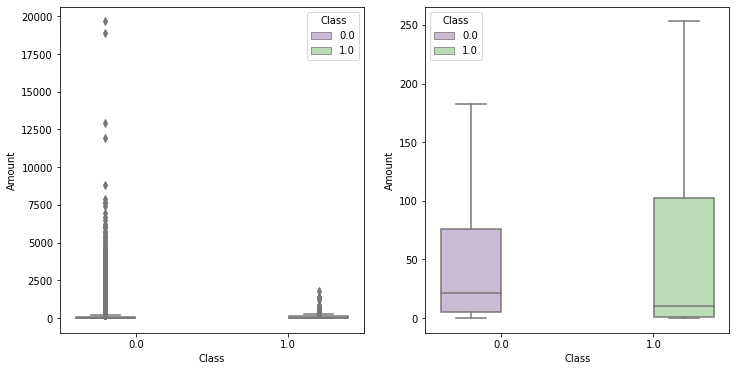

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [38]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    162200.000000
mean         86.929842
std         244.400180
min           0.000000
25%           5.380000
50%          21.350000
75%          76.070000
max       19656.530000
Name: Amount, dtype: float64

In [39]:
class_1.describe()


count     356.000000
mean      112.005000
std       228.517058
min         0.000000
25%         1.000000
50%         9.905000
75%       102.125000
max      1809.680000
Name: Amount, dtype: float64

In [41]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')


Features correlation

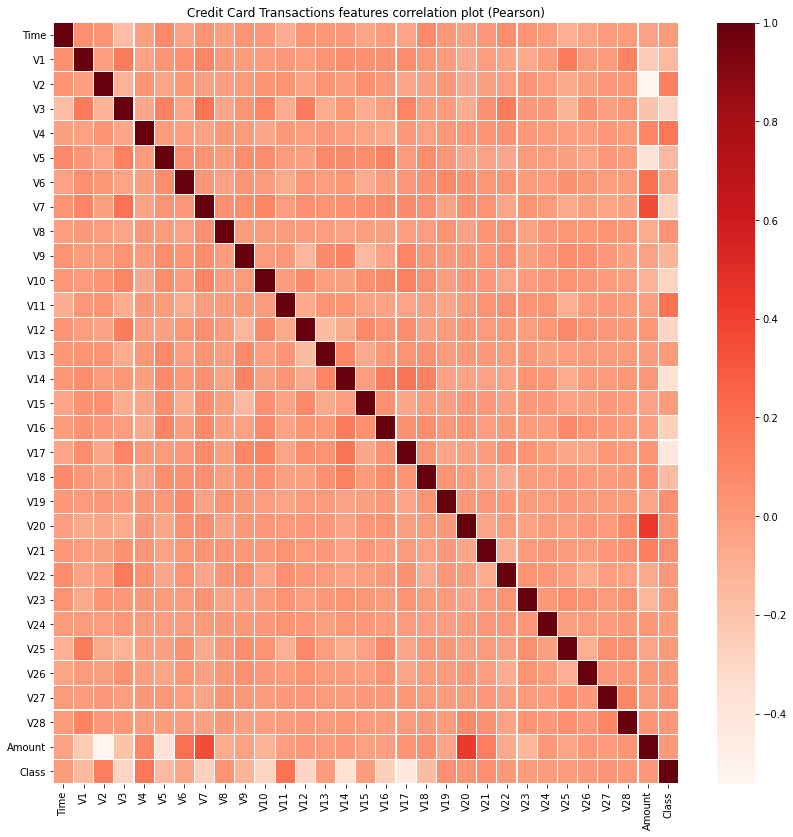

In [43]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

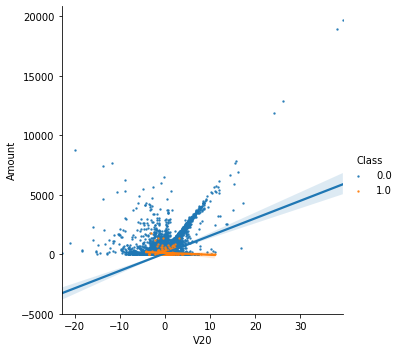

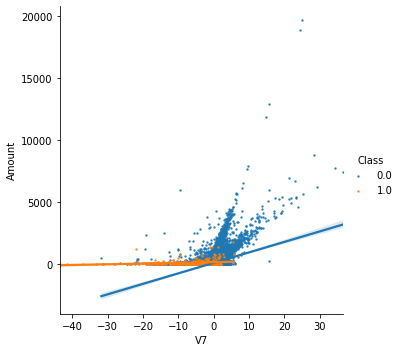

In [45]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

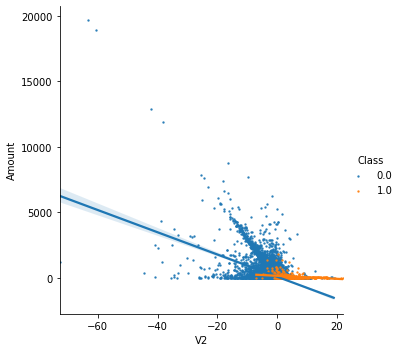

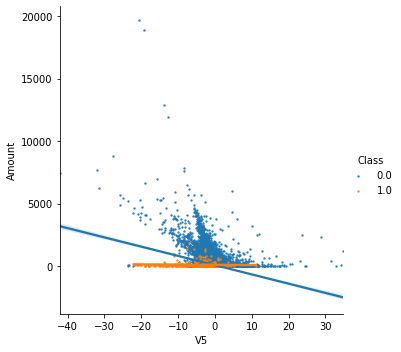

In [46]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

Features density plot


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 432x288 with 0 Axes>

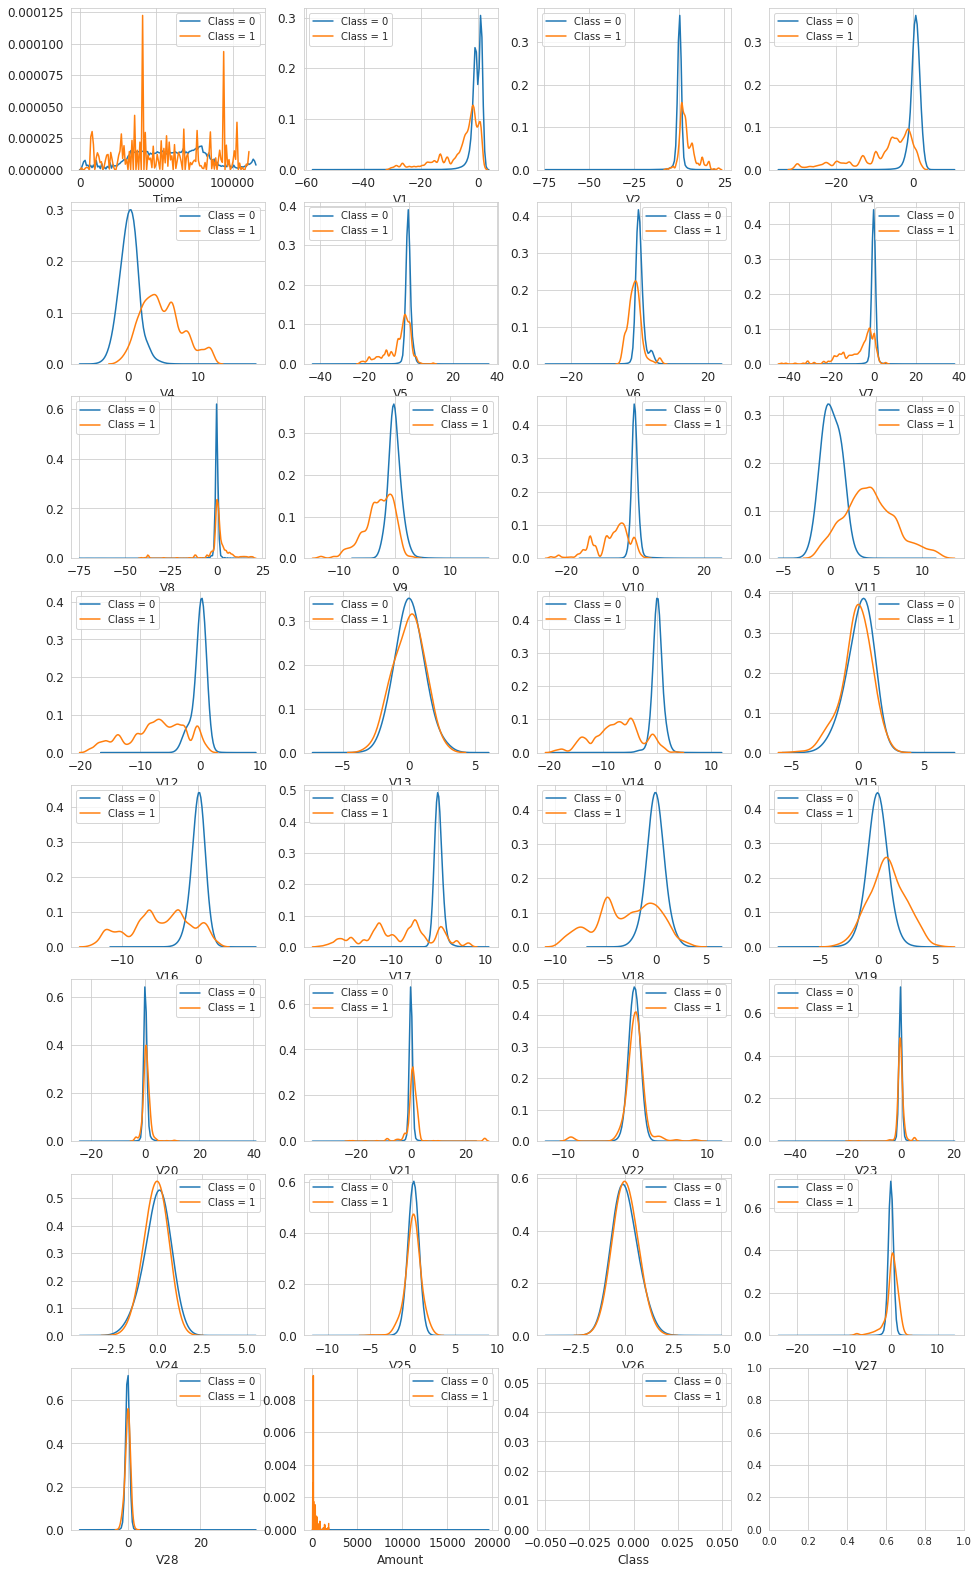

In [49]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();


Predictive models¶
Define predictors and target values
Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [0]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

Split data in train, test and validation set¶


In [0]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

RandomForestClassifier


In [0]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [0]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


CONFUSION MATRIX


In [0]:
cm = pd.crosstab(df[target].values, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()